In [1]:
import os
import numpy as np
import pandas as pd

from keras.preprocessing import image

from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D


Using TensorFlow backend.


In [2]:
#INPUT_PATH = '/kaggle/input'
INPUT_PATH = './input'
IMAGE_DIR = os.path.join(INPUT_PATH, 'faces_images/faces_images')
TRAIN_CSV_PATH = os.path.join(INPUT_PATH, 'train_vision.csv')
TEST_CSV_PATH = os.path.join(INPUT_PATH, 'test_vision.csv')

os.listdir(INPUT_PATH)

['faces_images', 'train_vision.csv', 'test_vision.csv']

# Load Data

In [3]:
train_csv = pd.read_csv(TRAIN_CSV_PATH)
test_csv = pd.read_csv(TEST_CSV_PATH)

train_csv.head()

,filename,label
0,face_3267.png,1
1,face_587.png,4
2,face_6585.png,4
3,face_3094.png,4
4,face_1170.png,4


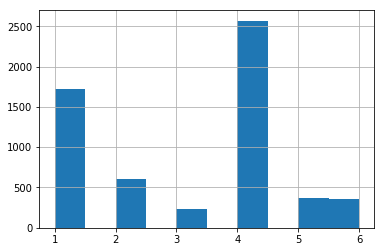

In [4]:
train_csv['label'].hist()

In [5]:
def load_image_array(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    image_array = image.img_to_array(img)
    
    return image_array
    
def load_image_data(filenames):
    image_data = [load_image_array(os.path.join(IMAGE_DIR, filename)) for filename in filenames]
    
    return np.array(image_data).astype(float)/255.

In [6]:
X_train = load_image_data(train_csv['filename'].values)
y_train = pd.get_dummies(train_csv['label'].astype(str))

In [7]:
X_train.shape

(5850, 128, 128, 3)

In [8]:
y_train[:5]

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


# Define Model

https://www.kaggle.com/karanjakhar/facial-keypoint-detection/notebook

In [9]:
def get_model():
    model = Sequential()

    model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(128,128,3)))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())

    model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())

    model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())

    model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
    # model.add(BatchNormalization())
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())

    model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())

    model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())

    model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())


    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation='softmax'))
    
    return model

In [11]:
model_glasses = get_model()
model_ = get_model()
model_glasses = get_model()

In [12]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train

In [13]:
model.fit(X_train, y_train, 
          epochs=1, batch_size=256, validation_split=0.2)

Train on 4680 samples, validate on 1170 samples
Epoch 1/1
4680/4680 [==============================] - 472s 101ms/step - loss: 4.4490 - accuracy: 0.3821 - val_loss: 3.5181 - val_accuracy: 0.3274


# Test

In [14]:
binary_dict = {'glasses': 1, 'kid': 2, 'femail': 4}
label_dict = {0: '1', 1: '2', 2: '3', 3: '3', 4: '4', 5: '5', 6: '6', 7: '6'}

In [15]:
X_test = load_image_data(test_csv['filename'].values)

In [16]:
pred_softmax = model.predict(X_test)

In [17]:
pred = np.argmax(pred_softmax, axis=1) + 1
pred

array([1, 4, 4, ..., 1, 1, 2])

In [18]:
submit = pd.DataFrame({'prediction': pred})
submit

,prediction
0,1
1,4
2,4
3,2
4,2
...,...
1995,1
1996,1
1997,1
1998,1


In [19]:
submit.to_csv('submission.csv', index=False)

---
# public score
1. 83.25
2. 85.50